<a href="https://colab.research.google.com/github/KimJunGu9/ADP_ML/blob/main/3_1_%EC%95%99%EC%83%81%EB%B8%94(%EB%B0%B0%EA%B9%85_%ED%9A%8C%EA%B7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 배깅(회귀)

# 앙상블 기법

# 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측모형을 만드는 방법
# 편향, 잡음 및 분산으로 인한 오류와 같은 문제를 회피하기 위해 사용됨
# 의사결정나무에 주로 사용
# 배깅(bagging)과 부스팅(boosting), 랜덤 포레스트 (random forest)가 가장 대표적

In [ ]:
# 붓스트랩 (Bootstrap)

# 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 단순임의복원추출법(중복허용)을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법
# 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산

In [ ]:
# 배깅 (Bagging: Bootstrap aggregating)

# 주어진 자료를 모집단으로 생각하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방법
# 통계분류와 회귀 분석에서 사용되는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안된 일종의 앙상블 학습법의 알고리즘
# 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합(overfitting)을 피하도록 함
# 붓스트래핑, 모델링, 보팅 순으로 진행됨
# 보팅(voting) : 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 선정하는 과정
# 최적 의사결정 나무 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 나무를 최대로 성장시킨 후 보팅함
# 훈련자료의 모집단의 분포를 몰라 평균예측모형을 구할 수 없다는 문제를 해결하기 위해 훈련 자료를 모집단으로 생각하고 평균예측모형을 구하여 분산을 줄이고 예측력을 향상시킴
# 부스팅과의 차이점
# 주어진 자료보다 분산이 적은 앙상블 모델을 얻는 데 중점을 둠
# 각 붓스트랩에 대해 붓스트래핑 및 모델링 과정이 병렬적으로 수행됨

In [ ]:
# sklearn.ensemble.BaggingRegressor(
#     base_estimator=None,
#     n_estimators=10,
#     max_samples=1.0, max_features=1.0,
#     bootstrap=True,
#     bootstrap_features=False,
#     oob_score=False)

In [ ]:
# base_estimator : 배깅에서 수행할 분류기 (None이면 DecisionTreeClassifier를 수행)
# n_estimators : 앙상블의 분류기 모델의 수 (int, default=10)
# max_samples : 각 기본 추정량을 훈련하기 위해 추출 할 샘플 수 (int or float, default=1.0)
# max_features : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수 (int or float, default=1.0)
# bootstrap : 샘플(행)을 복원추출할지 여부 (bool, default=True)
# bootstrap_features : feature(열)를 복원추출할지 여부 (bool, default=False)
# oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부 (bool, default=False)

In [ ]:
# BaggingRegressor().fit(X, Y) # 모델 적합
# BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측
# BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

In [ ]:
# kc_house_data.csv를 train과 test 데이터로 분할하고 train 데이터를 활용하여 BaggingRegressor 모델을 만들어라

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ADP/Part.2/1. 통계분석/data/data/kc_house_data.csv')

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,standard,0,3,7,1180,0,1955,0,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,standard,0,3,7,2170,400,1951,1991,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,standard,0,3,6,770,0,1933,0,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,standard,0,5,7,1050,910,1965,0,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,standard,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,standard,0,3,8,1530,0,2009,0,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,standard,0,3,8,2310,0,2014,0,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,standard,0,3,7,1020,0,2009,0,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,standard,0,3,8,1600,0,2004,0,1410,1287


In [5]:
df = df.drop(['id','date'], axis=1)

In [6]:
X = df.drop('price',axis=1)
y = df['price']

In [7]:
X = pd.get_dummies(data = X, columns=['waterfront'])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [9]:
from sklearn.ensemble import BaggingRegressor

model_bag_reg = BaggingRegressor()
model_bag_reg.fit(X_train, y_train)

BaggingRegressor()

In [10]:
print(model_bag_reg.score(X_train,y_train))
print(model_bag_reg.score(X_test, y_test))

0.9500390719846153
0.738043147824979


In [11]:
# Out of Bag 샘플을 활용한 성능 측정

# train data, test data를 split하지않아도 , holdout기법을 사옹하지않아도 된다.
# x,y의 값 자체를 fit시킨다

In [12]:
model_bag_reg_oob = BaggingRegressor(n_estimators=100, oob_score=True)
model_bag_reg_oob.fit(X, y)

BaggingRegressor(n_estimators=100, oob_score=True)

In [13]:
print(f"oob score : {model_bag_reg_oob.oob_score_}")

oob score : 0.7516626857159227


In [14]:
model_bag_reg = BaggingRegressor(n_estimators=100)
model_bag_reg.fit(X_train, y_train)

BaggingRegressor(n_estimators=100)

In [15]:
print(model_bag_reg.score(X_train,y_train))
print(model_bag_reg.score(X_test, y_test))

0.9632833957063762
0.7591249968175617


In [16]:
# 트리모델 기반의 회귀분석은 feature_importances_ 라는 것이 있는데, 회귀모형 중에서
# 어떠한 변수가 가장 많은 역할을 했는가를 봐야한다.
# feature_importances_가 높을수록 이 분류기를 분류하는데에 많은 영향을 준것이다.


from sklearn import tree

model_bag_reg.estimators_[0].feature_importances_

array([0.00912382, 0.02005352, 0.28169083, 0.02591019, 0.00524265,
       0.01520032, 0.00780587, 0.35844977, 0.0280856 , 0.0115595 ,
       0.0922845 , 0.0048067 , 0.06019606, 0.0557666 , 0.00121709,
       0.02260698])

In [17]:
## 변수의 중요도 확인

importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_bag_reg.estimators_], axis=0))

feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances

# 변수의 상대적 중요도를 보았을 때 회귀 계수처럼 파악을 할 수 있다. 
# 변수 중요도가 큰 것을 파악할 수 있음

,col_name,feature_importance
0,bedrooms,0.008448
1,bathrooms,0.023306
2,sqft_living,0.257793
3,sqft_lot,0.035835
4,floors,0.005397
5,view,0.022612
6,condition,0.006889
7,grade,0.357480
8,sqft_above,0.029032
9,sqft_basement,0.014604


In [18]:
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,grade,0.357480
1,sqft_living,0.257793
2,yr_built,0.103993
3,sqft_living15,0.064076
4,sqft_lot15,0.044970
5,sqft_lot,0.035835
6,sqft_above,0.029032
7,bathrooms,0.023306
8,view,0.022612
9,sqft_basement,0.014604


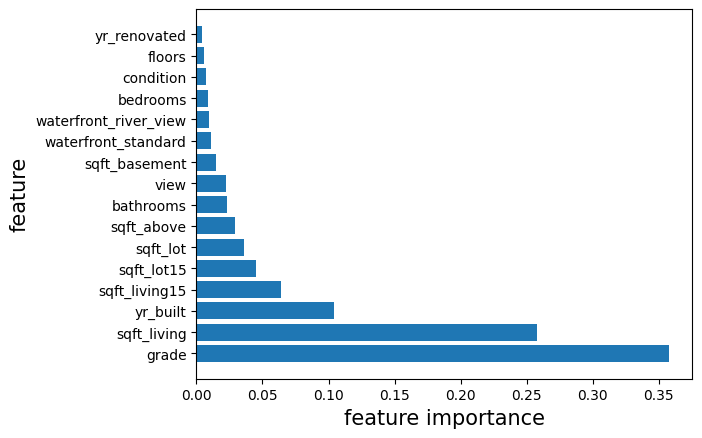

In [19]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

# grade가 회귀분석을 하는데에 있어서 많은 영향을 줌
# sqft_living15, yr_built, sqft_living, grade를 컨트롤을 한다면 집값을 예측할 수 있다.